# Inversion with structural constraints

Any inversion suffers from ambiguity and missing resolution at depth.
Structural information can provide valuable information about geological
boundaries in the subsurface. Such information can come from wave methods
like seismics (Tanner et al. 2020), ground-penetrating radar (Doetsch et
al. 2012, Jiang et al. 2020) or even piece-wise from boreholes (Wunderlich
et al. 2018). This can be done in both 2D (Jiang et al. 2020) using lines
or in 3D using facets (Doetsch et al. 2012).

We demonstrate on a very simple example from a bedrock detection how
a structural interface from a seismic refraction can lead to models that
are far easier to interpret.

In [3]:
import numpy as np
import pygimli as pg
import pygimli.meshtools as mt
from pygimli.physics import ert

First we load the data and the interface

In [4]:
data = ert.load("bedrock.dat")  # loadExampleData
xz = np.genfromtxt("bedrock.xy")

We estimate an error and do a normal inversion using the ERT manager.
As we expect more or less layered structures, we choose a vertical
weighting factor for the regularization of 0.5.m

In [5]:
data.estimateError()
mgr = ert.Manager(data)
mgr.invert(zWeight=0.5, verbose=True)

26/10/23 - 09:00:36 - pyGIMLi - INFO - Cache c:\Guenther.T\src\gimli\gimli\pygimli\physics\ert\ert.py:createGeometricFactors restored (0.0s x 3): C:\Guenther.T\Anwendungsdaten\pygimli\Cache\12873866182932235952
26/10/23 - 09:00:36 - pyGIMLi - INFO - Found 2 regions.
26/10/23 - 09:00:36 - pyGIMLi - INFO - (ERTModelling) Region with smallest marker (1) set to background.
26/10/23 - 09:00:36 - pyGIMLi - INFO - Found 2 regions.
26/10/23 - 09:00:36 - pyGIMLi - INFO - (ERTModelling) Region with smallest marker (1) set to background.
26/10/23 - 09:00:36 - pyGIMLi - INFO - Creating forward mesh from region infos.
26/10/23 - 09:00:36 - pyGIMLi - INFO - Creating refined mesh (H2) to solve forward task.
26/10/23 - 09:00:36 - pyGIMLi - INFO - Mesh for forward task: Mesh: Nodes: 2272 Cells: 4268 Boundaries: 3338
26/10/23 - 09:00:36 - pyGIMLi - INFO - Use median(data values)=254.49
26/10/23 - 09:00:36 - pyGIMLi - INFO - Created startmodel from forward operator: 821, min/max=254.490000/254.490000
26/

fop: <pygimli.physics.ert.ertModelling.ERTModelling object at 0x00000277A915D7C0>
Data transformation: <pgcore._pygimli_.RTransLogLU object at 0x000002775E19DD10>
Model transformation (cumulative):
	 0 <pgcore._pygimli_.RTransLogLU object at 0x00000277A91EDD60>
min/max (data): 55.69/508
min/max (error): 3%/3%
min/max (start model): 254/254
--------------------------------------------------------------------------------
chi² = 342.85
--------------------------------------------------------------------------------
inv.iter 1 ... chi² = 10.88 (dPhi = 96.52%) lam: 20
--------------------------------------------------------------------------------
inv.iter 2 ... chi² = 8.42 (dPhi = 21.66%) lam: 20.0
--------------------------------------------------------------------------------
inv.iter 3 ... chi² = 5.58 (dPhi = 31.04%) lam: 20.0
--------------------------------------------------------------------------------
inv.iter 4 ... chi² = 0.47 (dPhi = 76.98%) lam: 20.0


##########################

821 [177.88268478219692,...,1601.4487692120354]

We plot the inversion result using a defined color scale.
Additionally, we plot the measured line on top of it and see that generally
there is a change from conductive overburden to resistive bedrock.

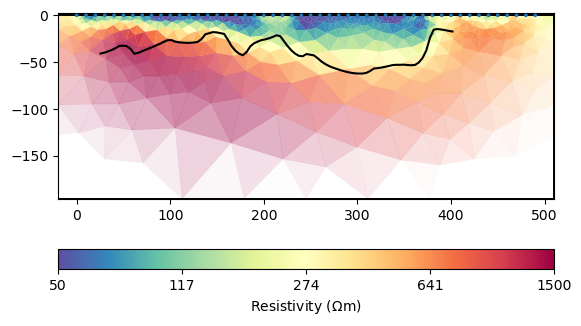

In [6]:
ax, cb = mgr.showResult(cMin=50, cMax=1500)
ax.plot(xz[:, 0], xz[:, 1], "k-")

We now want to include this line into the inversion mesh.
Therefore we generate the geometry of the inversion, a polygone from the line and merge both objects before we send it to the mesh generation.

(<Axes: >, <matplotlib.colorbar.Colorbar at 0x277b5722160>)

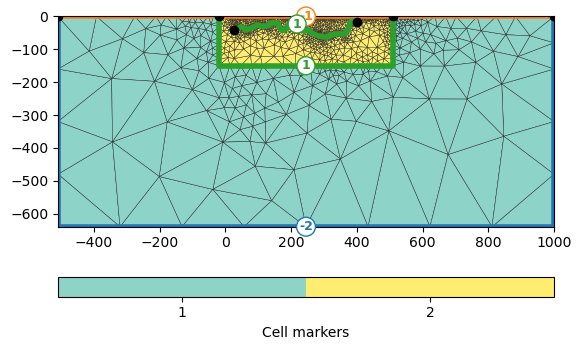

In [7]:
plc = mt.createParaMeshPLC(data, paraDepth=150, boundary=1)
line = mt.createPolygon(xz)
plc += line
mesh = mt.createMesh(plc, quality=34.3)
pg.show(mesh, markers=True, showMesh=True)

We see the outer boundaries have markers of -1 (homogeneous Neumann, no-flow)
and -2 (mixed) important to define the boundary conditions of the forward
problem. The interface between the inversion domain (yellow) and the outer
region (blue) and the added interface are >0 and do not affect the forward.
We now use the generated mesh in a new ERT manager by setting it.

In [8]:
mgr = ert.Manager(data)
mgr.setMesh(mesh)
mgr.invert(verbose=True)

26/10/23 - 09:00:41 - pyGIMLi - INFO - Found 2 regions.
26/10/23 - 09:00:41 - pyGIMLi - INFO - (ERTModelling) Region with smallest marker (1) set to background.
26/10/23 - 09:00:41 - pyGIMLi - INFO - Creating forward mesh from region infos.
26/10/23 - 09:00:41 - pyGIMLi - INFO - Creating refined mesh (H2) to solve forward task.
26/10/23 - 09:00:41 - pyGIMLi - INFO - Mesh for forward task: Mesh: Nodes: 4779 Cells: 9264 Boundaries: 7094
26/10/23 - 09:00:41 - pyGIMLi - INFO - Use median(data values)=254.49
26/10/23 - 09:00:41 - pyGIMLi - INFO - Created startmodel from forward operator: 1907, min/max=254.490000/254.490000
26/10/23 - 09:00:41 - pyGIMLi - INFO - Starting inversion.


fop: <pygimli.physics.ert.ertModelling.ERTModelling object at 0x00000277B5528130>
Data transformation: <pgcore._pygimli_.RTransLogLU object at 0x00000277B5528270>
Model transformation: <pgcore._pygimli_.RTransLog object at 0x00000277B55281D0>
min/max (data): 55.69/508
min/max (error): 3%/3%
min/max (start model): 254/254
--------------------------------------------------------------------------------
chi² = 342.85
--------------------------------------------------------------------------------
inv.iter 1 ... chi² = 9.96 (dPhi = 96.63%) lam: 20
--------------------------------------------------------------------------------
inv.iter 2 ... chi² = 7.87 (dPhi = 19.95%) lam: 20.0
--------------------------------------------------------------------------------
inv.iter 3 ... chi² = 5.79 (dPhi = 23.98%) lam: 20.0
--------------------------------------------------------------------------------
inv.iter 4 ... chi² = 2.16 (dPhi = 50.36%) lam: 20.0
------------------------------------------------

1907 [2509.0079355116845,...,1578.8861236682897]

As a result, we see sharp resistivity jumps across the line in the center
of the profile, i.e. the resistivity structure follows the given hints.
At other positions like at the beginning of the profile, it does not show
such strong contrasts indicating that the bedrock interface is probably more
shallow and there is likely a weathered zone.

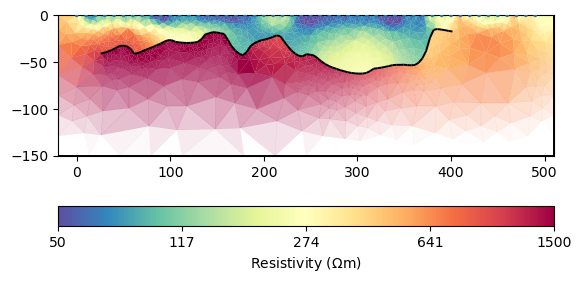

In [9]:
ax, cb = mgr.showResult(cMin=50, cMax=1500)

## References
* Doetsch, J., Linde, N., Pessognelli, M., Green, A.G. & Günther, T. (2012):
Constraining 3-D electrical resistance tomography with GPR data for improved
aquifer characterization. Journal of Applied Geophysics 78, 68-76,
doi:10.1016/j.jappgeo.2011.04.008.
* Wunderlich, T., Fischer, P., Wilken, D., Hadler, H., Erkul, E., Mecking, R.,
Günther, T., Heinzelmann, M., Vött, A. & Rabbel, W. (2018): Constraining
Electric Resistivity Tomography by Direct Push Electric Conductivity
logs and vibracores: An exemplary study of the Fiume Morto silted riverbed
(Ostia Antica, Western Italy). Geophysics 83(3), B87-B103, doi:10.1190/geo2016-0660.1.
* Tanner, D.C., Buness, H., Igel, J., Günther, T., Gabriel, G., Skiba, P.,
Plenefisch, T., Gestermann, N. & Walter, T. (2020): Fault Detection. in:
Tanner, C.D. & Brandes, C. (Eds.): Understanding Faults, 380p., Elsevier,
81-146, doi:10.1016/B978-0-12-815985-9.00003-5.
* Jiang, C., Igel, J., Dlugosch, R., Müller-Petke, M., Günther, T., Helms, J.,
Lang, J. & Winsemann (2020): Magnetic resonance tomography constrained by
ground-penetrating radar for improved hydrogeophysical characterisation,
Geophysics 85(6), JM13-JM26, doi:10.1190/geo2020-0052.1.
* Norooz, R., Olsson, P.-I., Dahlin, T., Günther, T. & Bernstone, C. (2021): A
geoelectrical pre-study of Älvkarleby test embankment dam: 3D forward
modelling and effects of structural constraints on the 3D inversion model of
zoned embankment dams. J. Appl. Geophys. 191, 104355, doi:10.1016/j.jappgeo.2021.104355.